In [1]:
 # import libraries
    
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

from collections import Counter
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.Class.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

## get class distribution

In [6]:
print ("Normal transaction:", df['Class'][df['Class'] == 0].count()) #class = 0
print ("Fraudulent transaction:", df['Class'][df['Class'] == 1].count()) #class = 1

Normal transaction: 284315
Fraudulent transaction: 492


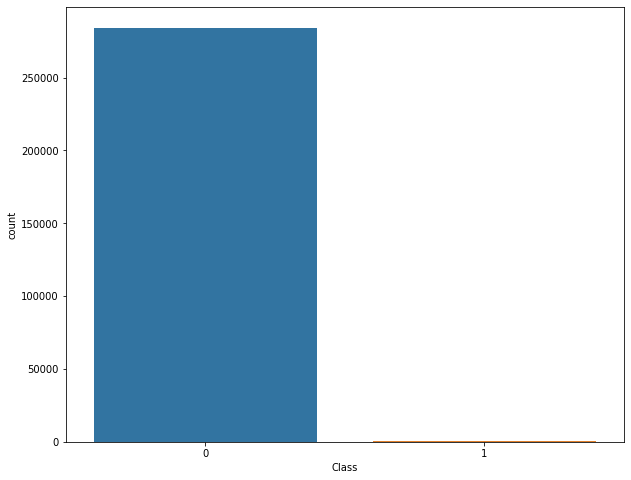

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Class',  data = df) #  we can see lots of disparity in their values, they seem very imbalanced

## First Try

In [8]:
# separate classes into different datasets
class0 = df.query('Class == 0')
class1 = df.query('Class == 1')

# randomize the datasets
class0 = class0.sample(frac=1)
class1 = class1.sample(frac=1)

In [9]:
# undersample majority class due to class imbalance before training - train
class0train = class0.iloc[0:6000]
class1train = class1

# combine subset of different classes into one balaced dataframe
train = class0train.append(class1train, ignore_index=True).values

In [10]:
train

array([[ 8.64930000e+04,  2.29145165e+00, -1.37504676e+00, ...,
        -6.62996387e-02,  4.00000000e+01,  0.00000000e+00],
       [ 1.39471000e+05, -2.71386152e-01,  5.22034453e-01, ...,
        -2.18676659e-01,  1.99500000e+01,  0.00000000e+00],
       [ 7.46110000e+04,  6.98877165e-01, -6.62222147e-01, ...,
         4.56654565e-02,  3.06120000e+02,  0.00000000e+00],
       ...,
       [ 3.45210000e+04,  1.08123378e+00,  4.16413936e-01, ...,
         1.05592082e-02,  1.52000000e+00,  1.00000000e+00],
       [ 9.38530000e+04, -6.18585748e+00,  7.10298492e+00, ...,
         3.98927186e-01,  4.49000000e+01,  1.00000000e+00],
       [ 5.70070000e+04, -1.27124419e+00,  2.46267527e+00, ...,
         2.50187093e-01,  1.00000000e-02,  1.00000000e+00]])

In [11]:
# split data into X and y
X = train[:,0:30].astype(float)
Y = train[:,30]

In [12]:
# XGBoost CV model
from xgboost import XGBClassifier
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=5, random_state=1)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring = scoring)
print( "AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.978 (0.007)


In [13]:
# change size of Matplotlib plot
fig_size = plt.rcParams["figure.figsize"] # Get current size

old_fig_params = fig_size
# new figure parameters
fig_size[0] = 12
fig_size[1] = 9
   
plt.rcParams["figure.figsize"] = fig_size # set new size

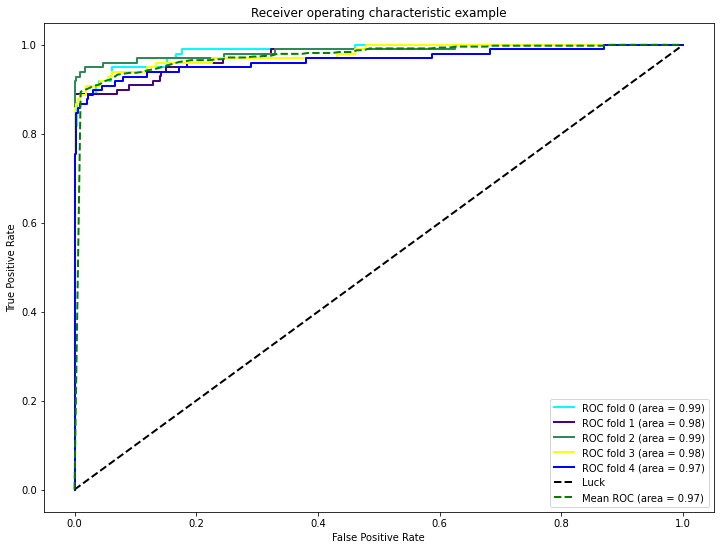

In [14]:
# plot roc-curve
from scipy import interp
from itertools import cycle

# code adapted from http://scikit-learn.org
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(kfold.split(X, Y), colors):
    probas_ = model.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= kfold.get_n_splits(X, Y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 2nd Try

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
#x = df.drop('Class', axis = 1)
#y = df['Class']

# selecting the 19 most important features according to our EDA 
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', \
        'V16', 'V17', 'V21', 'V23', 'V27']]

y = df['Class'] # selecting the target variable

In [17]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### undersampling the dATA because of the imbalance

In [18]:
df1 = df[df['Class']==1]
df0 = df[df['Class']==0].sample(600) # downsampling to 600 samples

# appending both classes
data_df = df1.append(df0)

In [19]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df) 
# reseting the index
data_df = data_df.reset_index(drop=True)
print(data_df.shape)
print(data_df.Class.value_counts()) # we still have some imbalance

(1092, 31)
0    600
1    492
Name: Class, dtype: int64


In [20]:
x_1 = data_df.drop('Class', axis = 1)
y_1 = data_df['Class']

In [21]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.25, random_state=1)

In [22]:
y_train.value_counts()

# Imbalance seen here

0    448
1    371
Name: Class, dtype: int64

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1) # defining an instance

x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)

In [24]:
print(x_train_balanced.shape, '\n' ,  y_balanced.shape)

(896, 30) 
 (896,)


In [25]:
y_balanced = pd.Series(y_balanced)

In [26]:
y_balanced.value_counts()

1    448
0    448
dtype: int64

In [27]:
x_train_balanced = pd.DataFrame(x_train_balanced, columns=x_train.columns)

In [28]:
x_train_balanced.head()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.columns)


In [29]:
x_test = x_test.reset_index(drop=True)

normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns)

In [30]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report


In [31]:
# xgboost with random forest
from xgboost import XGBRFClassifier
extreme = XGBRFClassifier(random_state = 1)
extreme.fit(normalised_train_df, y_balanced)
extreme_pred = extreme.predict(normalised_test_df)

In [32]:
#classification report
print(classification_report(y_test, extreme_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       152
           1       0.96      0.88      0.92       121

    accuracy                           0.93       273
   macro avg       0.94      0.92      0.93       273
weighted avg       0.93      0.93      0.93       273



In [33]:
#xgboost using gradient boosting
from xgboost import XGBClassifier
extreme1 = XGBClassifier(random_state = 1)
extreme1.fit(normalised_train_df, y_balanced)
extreme1_pred = extreme1.predict(normalised_test_df)

In [34]:
#classification report
print(classification_report(y_test, extreme1_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       152
           1       0.94      0.89      0.92       121

    accuracy                           0.93       273
   macro avg       0.93      0.92      0.93       273
weighted avg       0.93      0.93      0.93       273



In [35]:
kfold = StratifiedKFold(n_splits=4, random_state=1)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(extreme1, x_1, y_1, cv=kfold, scoring = scoring)
print( "AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.980 (0.005)


In [36]:
print('f1 score:', f1_score(y_test, extreme1_pred))

f1 score: 0.9152542372881356
